# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import pydotplus
import Graphviz
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

# Warning Suppression
import warnings
warnings.filterwarnings('ignore')

C:\shubhangi\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


### Importing Data`

In [2]:
selldata=pd.read_csv('SELL.csv')

In [3]:
selldata.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0


In [4]:
selldata.shape

(20000, 38)

### Checking For Datatype

In [1]:
selldata.dtypes

NameError: name 'selldata' is not defined

### Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

### how many rows have missing customer id

In [7]:
selldata['CUST_ID'].isnull().sum()

0

### lets drop id column from dataset----->(as its just a identifier as it is not dependant on behaviour , and any kind of lending decision must depend on customers behaviour rather than id.)

In [8]:
selldata=selldata.drop(['CUST_ID'],axis=1)

In [9]:
selldata

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,146,7,3,10,0,1,2,0,0,0,13100,0,0,973557.0,0,986657.0,0,0,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,0,47,M,287489.04,SAL,46-50,324,28,SA,104,8,2,10,0,1,1,0,0,0,6600,0,0,799813.0,0,806413.0,1,0,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,61,10,5,15,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1619210.0,1,0,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,0,53,M,71720.48,SAL,>50,196,13,CA,107,36,14,50,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,0,36,M,1671622.89,PROF,36-40,167,24,SA,185,20,1,21,1,0,0,0,0,0,0,808480,0,0.0,0,808480.0,0,0,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,41,F,181029.01,SENP,41-45,598,15,SA,165,4,3,7,1,0,0,0,2,0,0,277050,59460,0.0,0,336510.0,0,0,0,0,0,0.0,277050.0,29730.0,0.00,0.0,1,1
19996,0,37,F,46624.98,SELF-EMP,36-40,299,11,SA,49,17,14,31,4,2,3,1,4,0,17200,705740,24300,902772.0,46829,1696841.0,0,0,0,0,0,8600.0,176435.0,6075.0,300924.00,46829.0,1,0
19997,0,30,M,142433.53,PROF,26-30,722,11,SA,115,20,16,36,8,2,0,1,5,0,33400,83740,62210,0.0,132010,311360.0,0,0,0,0,0,16700.0,10467.5,12442.0,0.00,132010.0,1,0
19998,0,46,M,394654.75,SAL,46-50,234,4,SA,129,11,6,17,1,1,0,0,4,1,7700,195790,43550,0.0,0,247040.0,0,0,0,0,0,7700.0,195790.0,10887.5,0.00,0.0,1,0


### Defining Target and Independent Features

In [10]:
Y=selldata[['TARGET']]
X=selldata.drop(['TARGET'],axis=1)

### Get the Response Rate -mean gives you positive/success probablity of target in every 100 rows

In [11]:
Y.mean()

#12.56 i.e. around 13 rows have positive response in target variable.
#Y.sum() and Y.count gives total success count from enitire rows

TARGET    0.1256
dtype: float64

### Split features into Numerical and Categorical¶

In [12]:
numx=X.select_dtypes(include='number')
catx=X.select_dtypes(include='object')

In [13]:
catx

,GENDER,OCCUPATION,AGE_BKT,ACC_TYPE
0,M,SELF-EMP,26-30,SA
1,M,SAL,46-50,SA
2,M,SELF-EMP,36-40,SA
3,M,SAL,>50,CA
4,M,PROF,36-40,SA
...,...,...,...,...
19995,F,SENP,41-45,SA
19996,F,SELF-EMP,36-40,SA
19997,M,PROF,26-30,SA
19998,M,SAL,46-50,SA


### Dropping the indicator Flag features from num to build a separate Dataframe called Indicators

In [14]:
ind=numx[['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]
numx=numx.drop(['FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN'],axis=1)

In [15]:
numx

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
0,27,3383.75,776,30,146,7,3,10,0,1,2,0,0,13100,0,0,973557.0,0,986657.0,0,0,0,0,13100.0,0.0,0.0,486778.50,0.0
1,47,287489.04,324,28,104,8,2,10,0,1,1,0,0,6600,0,0,799813.0,0,806413.0,0,0,0,0,6600.0,0.0,0.0,799813.00,0.0
2,40,18216.88,603,2,61,10,5,15,1,1,1,0,2,11200,561120,49320,997570.0,0,1619210.0,0,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0
3,53,71720.48,196,13,107,36,14,50,4,2,3,1,4,26100,673590,60780,741506.0,71388,1573364.0,0,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0
4,36,1671622.89,167,24,185,20,1,21,1,0,0,0,0,0,808480,0,0.0,0,808480.0,0,0,0,0,0.0,808480.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,41,181029.01,598,15,165,4,3,7,1,0,0,0,2,0,277050,59460,0.0,0,336510.0,0,0,0,0,0.0,277050.0,29730.0,0.00,0.0
19996,37,46624.98,299,11,49,17,14,31,4,2,3,1,4,17200,705740,24300,902772.0,46829,1696841.0,0,0,0,0,8600.0,176435.0,6075.0,300924.00,46829.0
19997,30,142433.53,722,11,115,20,16,36,8,2,0,1,5,33400,83740,62210,0.0,132010,311360.0,0,0,0,0,16700.0,10467.5,12442.0,0.00,132010.0
19998,46,394654.75,234,4,129,11,6,17,1,1,0,0,4,7700,195790,43550,0.0,0,247040.0,0,0,0,0,7700.0,195790.0,10887.5,0.00,0.0


In [16]:
ind

,FLG_HAS_CC,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,0,1,1
1,0,1,1,0
2,0,1,1,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
19995,0,0,1,1
19996,0,0,1,0
19997,0,0,1,0
19998,1,0,1,0


In [17]:
catx

,GENDER,OCCUPATION,AGE_BKT,ACC_TYPE
0,M,SELF-EMP,26-30,SA
1,M,SAL,46-50,SA
2,M,SELF-EMP,36-40,SA
3,M,SAL,>50,CA
4,M,PROF,36-40,SA
...,...,...,...,...
19995,F,SENP,41-45,SA
19996,F,SELF-EMP,36-40,SA
19997,M,PROF,26-30,SA
19998,M,SAL,46-50,SA


###### now we have 3 dfs with flag indicators, numbers and chategorical datatypes from X dataset

## Outlier Analysis of Numerical Features

In [18]:
numx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.418150,5.113622e+05,440.150300,14.955650,125.239300,12.348050,6.63370,18.97540,1.883000,1.028950,1.172450,0.411750,2.137550,10990.015000,378474.478000,1.245200e+05,237307.771646,22424.704400,7.737170e+05,1.09950,1.292000,0.042750,0.04440,7408.839731,242236.478811,25092.478384,179059.029254,20303.920406
std,9.577985,7.235930e+05,249.887582,8.642634,54.953936,12.151921,7.67583,17.75929,2.263596,1.497239,2.404246,2.009854,2.384893,15304.891499,331417.730129,4.393795e+05,319067.664858,49484.803631,7.126592e+05,14.21922,14.764201,0.203038,0.20623,7210.168619,269837.890598,49387.197536,281706.855583,46472.889982
min,21.000000,0.000000e+00,100.000000,1.000000,29.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,8.930580e+03,133.000000,1.000000,39.000000,0.000000,1.00000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.500000e+03,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,1.925977e+04,157.000000,3.000000,49.000000,2.000000,1.00000,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.042700e+04,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.00000,9.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2990.000000,0.000000e+00,0.000000,0.000000,2.379355e+05,0.00000,0.000000,0.000000,0.00000,0.000000,1265.450000,0.000000,0.000000,0.000000
50%,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.00000,14.00000,1.000000,1.000000,0.000000,0.000000,2.000000,6900.000000,340150.000000,2.384000e+04,0.000000,0.000000,6.951150e+05,0.00000,0.000000,0.000000,0.00000,6000.000000,147095.000000,8645.000000,0.000000,0.000000
75%,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.00000,21.00000,2.000000,1.000000,1.000000,0.000000,4.000000,15800.000000,674675.000000,7.247000e+04,473970.500000,0.000000,1.078927e+06,0.00000,0.000000,0.000000,0.00000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000


### Capping and Flooring of outliers

In [19]:
# defining a function to drop outlier before and after 1% and 99% of overall data columns
def outliercap(a):
    a=a.clip(lower=a.quantile(0.01))
    a=a.clip(upper=a.quantile(0.99))
    return(a)

In [20]:
numx=numx.apply(lambda a:outliercap(a))
numx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.0,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,38.418150,5.033852e+05,440.029350,14.955650,125.239250,12.298500,6.398000,18.606450,1.870200,0.95085,1.097950,0.262800,2.127750,10681.070000,378416.978000,1.135705e+05,237188.572739,22384.500150,7.617689e+05,0.0,0.0,0.042600,0.044350,7402.146397,242069.668811,23902.817720,178912.462972,20244.200856
std,9.577985,6.811763e+05,249.516357,8.642634,54.915204,11.924446,6.250292,15.842327,2.204744,0.83706,1.949217,0.514246,2.343396,13296.760164,331311.186181,3.458507e+05,318788.155458,49345.427144,6.453939e+05,0.0,0.0,0.201959,0.205877,7194.628202,269381.088039,41567.221576,281289.853759,46251.396616
min,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,21.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,8.930580e+03,133.000000,1.000000,39.000000,0.000000,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.500000e+03,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,26.000000,1.925977e+04,157.000000,3.000000,49.000000,2.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.042700e+04,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.000000,9.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2990.000000,0.000000e+00,0.000000,0.000000,2.379355e+05,0.0,0.0,0.000000,0.000000,0.000000,1265.450000,0.000000,0.000000,0.000000
50%,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.000000,14.000000,1.000000,1.00000,0.000000,0.000000,2.000000,6900.000000,340150.000000,2.384000e+04,0.000000,0.000000,6.951150e+05,0.0,0.0,0.000000,0.000000,6000.000000,147095.000000,8645.000000,0.000000,0.000000
75%,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.000000,21.000000,2.000000,1.00000,1.000000,0.000000,4.000000,15800.000000,674675.000000,7.247000e+04,473970.500000,0.000000,1.078927e+06,0.0,0.0,0.000000,0.000000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000


### Missing Value Analysis

In [21]:
# numx.isnull().sum()
numx.isnull().mean()#too check what percentage is missing values

AGE                         0.0
BALANCE                     0.0
SCR                         0.0
HOLDING_PERIOD              0.0
LEN_OF_RLTN_IN_MNTH         0.0
NO_OF_L_CR_TXNS             0.0
NO_OF_L_DR_TXNS             0.0
TOT_NO_OF_L_TXNS            0.0
NO_OF_BR_CSH_WDL_DR_TXNS    0.0
NO_OF_ATM_DR_TXNS           0.0
NO_OF_NET_DR_TXNS           0.0
NO_OF_MOB_DR_TXNS           0.0
NO_OF_CHQ_DR_TXNS           0.0
AMT_ATM_DR                  0.0
AMT_BR_CSH_WDL_DR           0.0
AMT_CHQ_DR                  0.0
AMT_NET_DR                  0.0
AMT_MOB_DR                  0.0
AMT_L_DR                    0.0
AMT_OTH_BK_ATM_USG_CHGS     0.0
AMT_MIN_BAL_NMC_CHGS        0.0
NO_OF_IW_CHQ_BNC_TXNS       0.0
NO_OF_OW_CHQ_BNC_TXNS       0.0
AVG_AMT_PER_ATM_TXN         0.0
AVG_AMT_PER_CSH_WDL_TXN     0.0
AVG_AMT_PER_CHQ_TXN         0.0
AVG_AMT_PER_NET_TXN         0.0
AVG_AMT_PER_MOB_TXN         0.0
dtype: float64

In [22]:
#Since there is no missing value so imputation process is not required.

# Feature Selection - Numerical Features¶

### Part 1 : Remove Features with 0 Variance

In [23]:
from sklearn.feature_selection import VarianceThreshold
varrselector=VarianceThreshold(threshold=0)
varrselector.fit_transform(numx)
# Get columns to keep and create new dataframe with those only
cols=varrselector.get_support(indices=False)
num1=numx.iloc[:,cols]
print(num1.iloc[0])
print(num1.shape)
num1

AGE                             27.00
BALANCE                       3383.75
SCR                            776.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
NO_OF_L_CR_TXNS                  7.00
NO_OF_L_DR_TXNS                  3.00
TOT_NO_OF_L_TXNS                10.00
NO_OF_BR_CSH_WDL_DR_TXNS         0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_MOB_DR_TXNS                0.00
NO_OF_CHQ_DR_TXNS                0.00
AMT_ATM_DR                   13100.00
AMT_BR_CSH_WDL_DR                0.00
AMT_CHQ_DR                       0.00
AMT_NET_DR                  973557.00
AMT_MOB_DR                       0.00
AMT_L_DR                    986657.00
NO_OF_IW_CHQ_BNC_TXNS            0.00
NO_OF_OW_CHQ_BNC_TXNS            0.00
AVG_AMT_PER_ATM_TXN          13100.00
AVG_AMT_PER_CSH_WDL_TXN          0.00
AVG_AMT_PER_CHQ_TXN              0.00
AVG_AMT_PER_NET_TXN         486778.50
AVG_AMT_PER_MOB_TXN              0.00
Name: 0, dty

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,AMT_L_DR,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN
0,27,3383.75,776,30,146,7,3,10,0,1,2,0,0,13100,0,0.0,973557.0,0,986657.0,0,0,13100.0,0.0,0.0,486778.50,0.0
1,47,287489.04,324,28,104,8,2,10,0,1,1,0,0,6600,0,0.0,799813.0,0,806413.0,0,0,6600.0,0.0,0.0,799813.00,0.0
2,40,18216.88,603,2,61,10,5,15,1,1,1,0,2,11200,561120,49320.0,977006.9,0,1619210.0,0,1,11200.0,561120.0,24660.0,969391.70,0.0
3,53,71720.48,196,13,107,36,14,50,4,2,3,1,4,26100,673590,60780.0,741506.0,71388,1573364.0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0
4,36,1671622.89,167,24,185,20,1,21,1,0,0,0,0,0,808480,0.0,0.0,0,808480.0,0,0,0.0,808480.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,41,181029.01,598,15,165,4,3,7,1,0,0,0,2,0,277050,59460.0,0.0,0,336510.0,0,0,0.0,277050.0,29730.0,0.00,0.0
19996,37,46624.98,299,11,49,17,14,31,4,2,3,1,4,17200,705740,24300.0,902772.0,46829,1696841.0,0,0,8600.0,176435.0,6075.0,300924.00,46829.0
19997,30,142433.53,722,11,115,20,16,36,8,2,0,1,5,33400,83740,62210.0,0.0,132010,311360.0,0,0,16700.0,10467.5,12442.0,0.00,132010.0
19998,46,394654.75,234,4,129,11,6,17,1,1,0,0,4,7700,195790,43550.0,0.0,0,247040.0,0,0,7700.0,195790.0,10887.5,0.00,0.0


### //this dataset doesn't have any data which has 0 variance so here in this case it will not drop anything for us

## Part 2 - Bi Variate Analysis (Feature Discretization)

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,AGE_Rank,BALANCE_Rank,SCR_Rank,HOLDING_PERIOD_Rank,LEN_OF_RLTN_IN_MNTH_Rank,NO_OF_L_CR_TXNS_Rank,NO_OF_L_DR_TXNS_Rank,TOT_NO_OF_L_TXNS_Rank,NO_OF_BR_CSH_WDL_DR_TXNS_Rank,NO_OF_ATM_DR_TXNS_Rank,NO_OF_NET_DR_TXNS_Rank,NO_OF_MOB_DR_TXNS_Rank,NO_OF_CHQ_DR_TXNS_Rank,AMT_ATM_DR_Rank,AMT_BR_CSH_WDL_DR_Rank,AMT_CHQ_DR_Rank,AMT_NET_DR_Rank,AMT_MOB_DR_Rank,AMT_L_DR_Rank,NO_OF_IW_CHQ_BNC_TXNS_Rank,NO_OF_OW_CHQ_BNC_TXNS_Rank,AVG_AMT_PER_ATM_TXN_Rank,AVG_AMT_PER_CSH_WDL_TXN_Rank,AVG_AMT_PER_CHQ_TXN_Rank,AVG_AMT_PER_NET_TXN_Rank,AVG_AMT_PER_MOB_TXN_Rank
0,1.0,0.0,8.0,9.0,6.0,4.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0
1,7.0,5.0,4.0,9.0,3.0,4.0,2.0,3.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0
2,5.0,0.0,7.0,0.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0,0.0,2.0,3.0,4.0,2.0,4.0,0.0,9.0,0.0,0.0,3.0,6.0,3.0,4.0,0.0
3,9.0,2.0,1.0,4.0,4.0,9.0,7.0,9.0,4.0,2.0,1.0,1.0,4.0,5.0,5.0,2.0,3.0,1.0,9.0,0.0,0.0,4.0,3.0,1.0,2.0,1.0
4,4.0,9.0,1.0,8.0,8.0,8.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


###### ( num1['AGE'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]) & num1['AGE']) Ranking is done on the basis of 10 quantailes

## Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

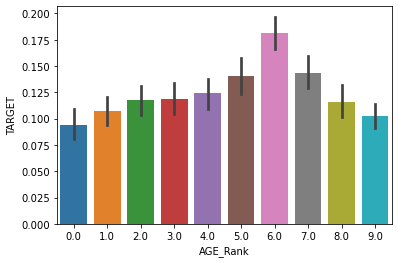

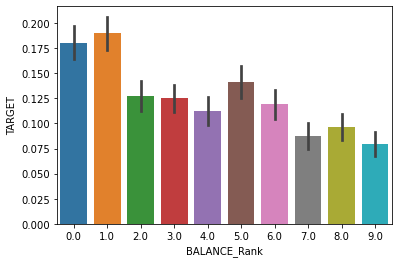

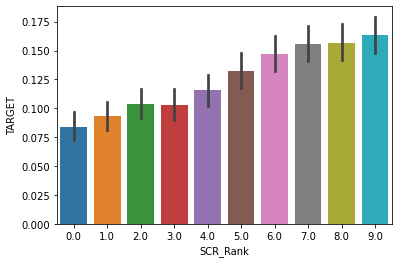

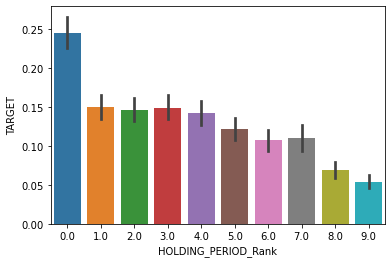

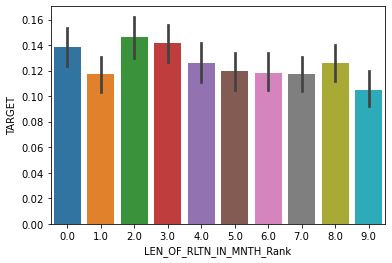

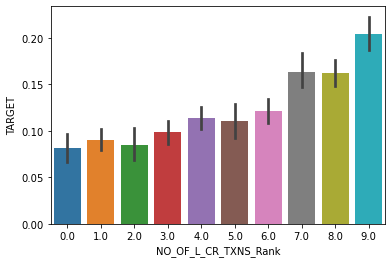

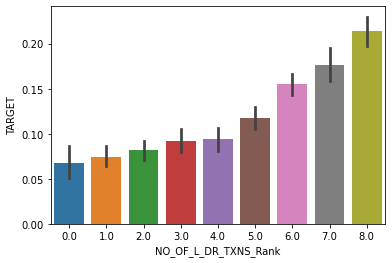

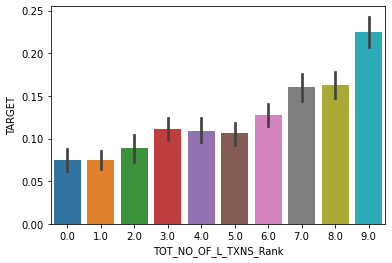

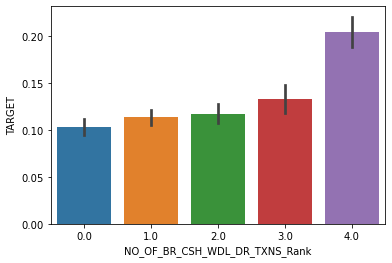

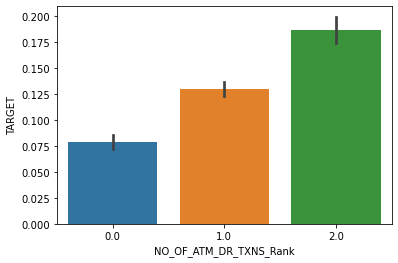

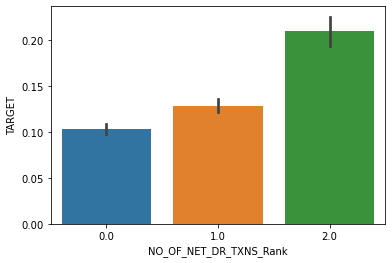

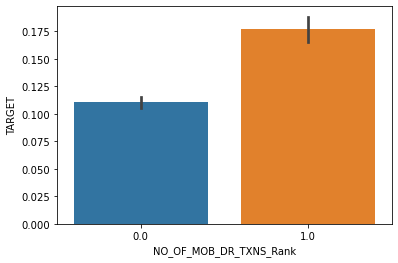

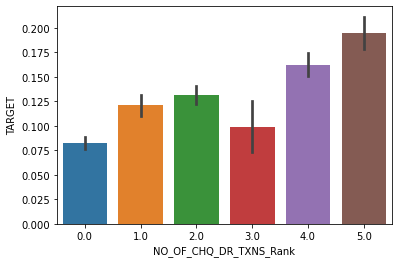

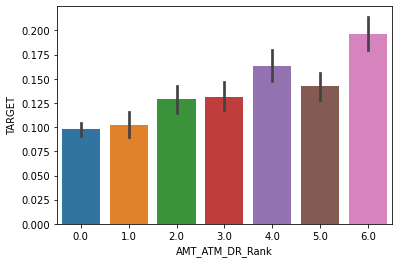

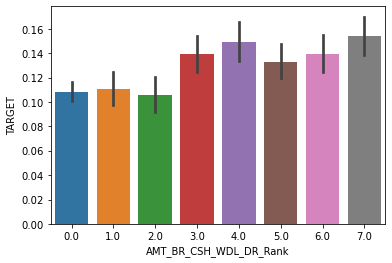

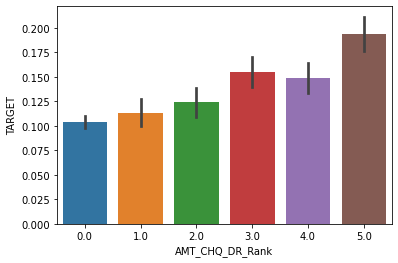

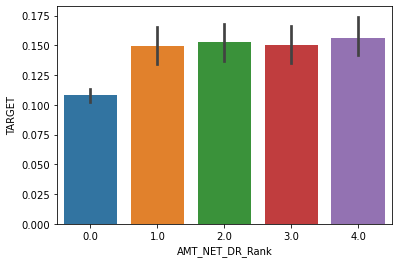

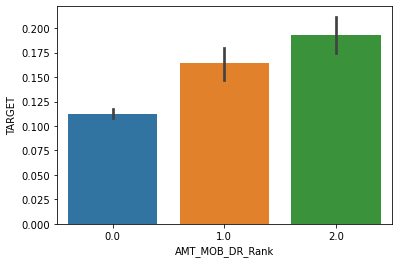

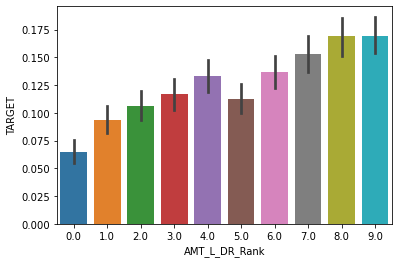

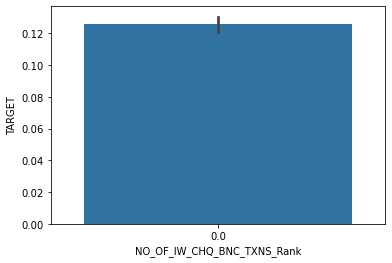

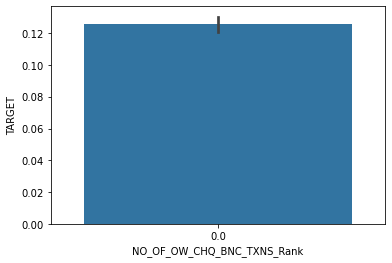

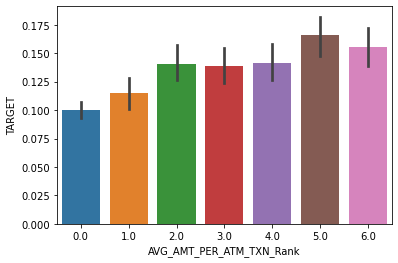

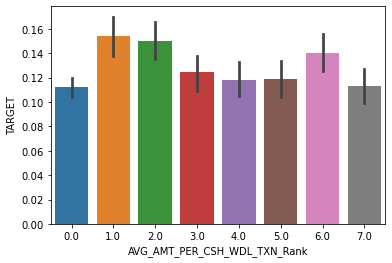

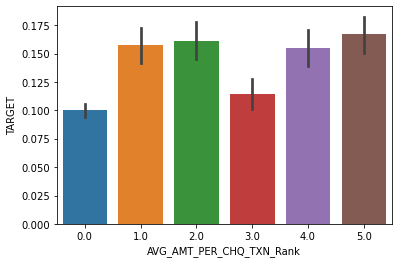

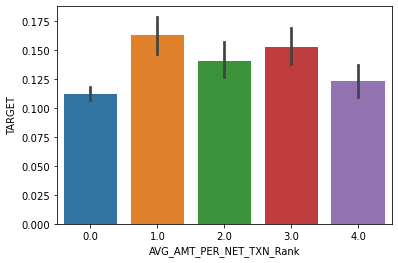

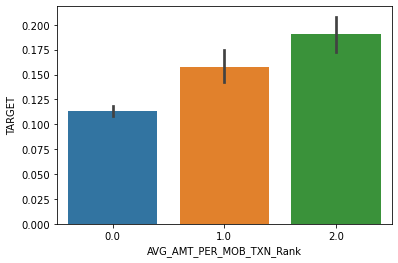

In [25]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_bin_combined, estimator=mean )
plt.show

#### cols giving linear incresing/decresing response curve with respect to target y are the useful columns for data predictions so 1st lets make list of least intrested columns wrt to graph visualization so that we can drop those columns from X_colleted dataset

In [26]:
num_varlist=['AVG_AMT_PER_NET_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_CSH_WDL_TXN','NO_OF_CHQ_DR_TXNS',
             'AMT_NET_DR','AMT_BR_CSH_WDL_DR','AGE']
num1=num1.drop(num_varlist,axis=1)

In [27]:
num1.shape
#out of 26 columns now we have only 19 columns after dropping least intrested columns

(20000, 19)

# Part 3 - Select K Best# 

#### now with the help of k best algorithm we will choose only k best columns

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=17)
selector.fit_transform(num1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num1.iloc[:,cols]

In [29]:
select_features_df_num.iloc[0]

BALANCE                       3383.75
SCR                            776.00
HOLDING_PERIOD                  30.00
LEN_OF_RLTN_IN_MNTH            146.00
NO_OF_L_CR_TXNS                  7.00
NO_OF_L_DR_TXNS                  3.00
TOT_NO_OF_L_TXNS                10.00
NO_OF_BR_CSH_WDL_DR_TXNS         0.00
NO_OF_ATM_DR_TXNS                1.00
NO_OF_NET_DR_TXNS                2.00
NO_OF_MOB_DR_TXNS                0.00
AMT_ATM_DR                   13100.00
AMT_CHQ_DR                       0.00
AMT_MOB_DR                       0.00
AMT_L_DR                    986657.00
AVG_AMT_PER_ATM_TXN          13100.00
AVG_AMT_PER_MOB_TXN              0.00
Name: 0, dtype: float64

##### now we are done with numerical datavariables lets do preprocessing on Categorical variables

# Feature Selection - Categorical Features¶

In [30]:
catx.dtypes

GENDER        object
OCCUPATION    object
AGE_BKT       object
ACC_TYPE      object
dtype: object

In [31]:
Y

,TARGET
0,0
1,0
2,0
3,0
4,0
...,...
19995,0
19996,0
19997,0
19998,0


### Part 1 - Bi Variate Analysis

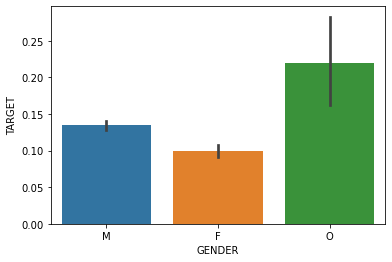

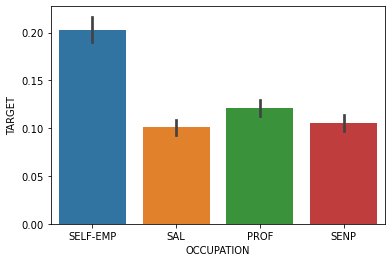

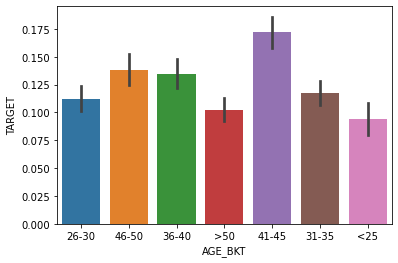

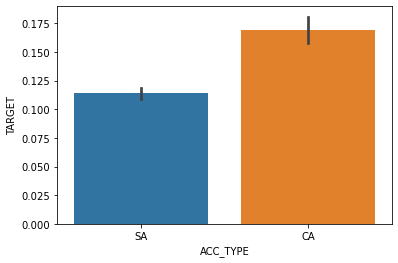

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,catx],axis=1,join='inner')

from numpy import mean
for col in (catx.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_char_merged, estimator=mean )
plt.show()

In [33]:
char=catx.drop(['AGE_BKT'],axis=1)
char

,GENDER,OCCUPATION,ACC_TYPE
0,M,SELF-EMP,SA
1,M,SAL,SA
2,M,SELF-EMP,SA
3,M,SAL,CA
4,M,PROF,SA
...,...,...,...
19995,F,SENP,SA
19996,F,SELF-EMP,SA
19997,M,PROF,SA
19998,M,SAL,SA


In [34]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape
X_char_dum

,GENDER_M,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA
0,1,0,0,1,0,1
1,1,0,1,0,0,1
2,1,0,0,1,0,1
3,1,0,1,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
19995,0,0,0,0,1,1
19996,0,0,0,1,0,1
19997,1,0,0,0,0,1
19998,1,0,1,0,0,1


# Part 2 - Select K Best

In [35]:
# Select K Best for Categorical Featuresss
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=5)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [36]:
select_features_df_char.iloc[0]

GENDER_O               0
OCCUPATION_SAL         0
OCCUPATION_SELF-EMP    1
OCCUPATION_SENP        0
ACC_TYPE_SA            1
Name: 0, dtype: uint8

# Feature Selection - Numerical Indicator Features 

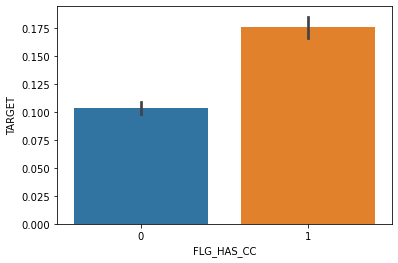

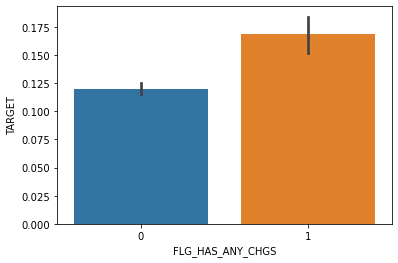

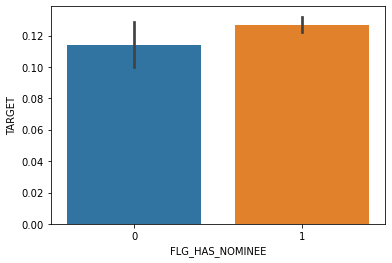

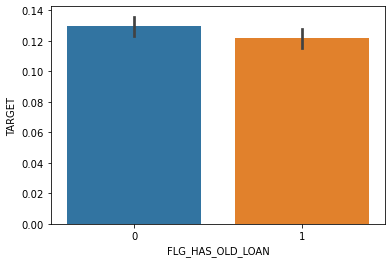

In [37]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="TARGET",data=X_ind_merged, estimator=mean )
plt.show()

In [38]:
select_features_df_ind=ind.drop(['FLG_HAS_OLD_LOAN','FLG_HAS_NOMINEE'],axis=1)

# Creating the Master Feature Set for Model Development

In [39]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [40]:
Y['TARGET'].value_counts()

0    17488
1     2512
Name: TARGET, dtype: int64

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [42]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (14000, 24)
Shape of Testing Data (6000, 24)
Response Rate in Training Data TARGET    0.127286
dtype: float64
Response Rate in Testing Data TARGET    0.121667
dtype: float64


In [43]:
X_train.describe()

,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,AMT_ATM_DR,AMT_CHQ_DR,AMT_MOB_DR,AMT_L_DR,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_CC,FLG_HAS_ANY_CHGS
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,1.400000e+04,14000.00000,1.400000e+04,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.009857,0.293143,0.175857,0.258357,0.789929,5.065617e+05,442.195857,14.913357,125.668429,12.277357,6.377929,18.562643,1.858571,0.948214,1.088214,0.260714,10596.335714,1.126710e+05,22170.81950,7.582093e+05,7378.914946,20096.527651,0.303643,0.108786
std,0.098796,0.455220,0.380712,0.437747,0.407374,6.876096e+05,249.481282,8.644332,54.877401,11.977376,6.221312,15.861851,2.194551,0.834786,1.936156,0.510787,13157.600314,3.432869e+05,49020.98899,6.424190e+05,7156.819165,46068.757413,0.459847,0.311381
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,6.404230e+04,229.000000,7.000000,79.000000,6.000000,2.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,2.376700e+05,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.304982e+05,366.000000,15.000000,126.000000,10.000000,5.000000,14.000000,1.000000,1.000000,0.000000,0.000000,6900.000000,2.387000e+04,0.00000,6.912165e+05,6000.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.543132e+05,647.000000,22.000000,173.000000,14.000000,7.000000,21.000000,2.000000,1.000000,1.000000,0.000000,15800.000000,7.236000e+04,0.00000,1.073895e+06,13500.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.412760e+06,970.000000,31.000000,219.000000,64.000000,31.000000,79.000000,11.000000,4.000000,9.000000,2.000000,66400.000000,2.738097e+06,190805.00000,3.767743e+06,23700.500000,188382.000000,1.000000,1.000000


In [44]:
X_test.describe()

,GENDER_O,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,ACC_TYPE_SA,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,AMT_ATM_DR,AMT_CHQ_DR,AMT_MOB_DR,AMT_L_DR,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_CC,FLG_HAS_ANY_CHGS
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.008833,0.291833,0.184333,0.257167,0.783333,4.959731e+05,434.974167,15.054333,124.237833,12.347833,6.444833,18.708667,1.897333,0.957000,1.120667,0.267667,10878.783333,1.156692e+05,22883.088333,7.700747e+05,7456.353115,20588.771667,0.309500,0.114833
std,0.093578,0.454644,0.387788,0.437108,0.412008,6.659215e+05,249.545828,8.638585,54.994860,11.800864,6.317669,15.797523,2.228292,0.842379,1.979333,0.522239,13614.997841,3.517803e+05,50094.855600,6.522610e+05,7282.398370,46676.818357,0.462326,0.318847
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.677630e+03,106.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,6.588102e+04,223.000000,8.000000,77.000000,6.000000,2.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.383332e+05,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,2.338317e+05,359.000000,15.000000,124.000000,10.000000,5.000000,14.000000,1.000000,1.000000,0.000000,0.000000,7000.000000,2.359000e+04,0.000000,7.034270e+05,6050.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,6.538440e+05,633.000000,22.000000,171.000000,15.000000,7.000000,21.000000,2.000000,1.000000,1.000000,0.000000,15800.000000,7.263000e+04,0.000000,1.091386e+06,13700.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.412760e+06,970.000000,31.000000,219.000000,64.000000,31.000000,79.000000,11.000000,4.000000,9.000000,2.000000,66400.000000,2.738097e+06,190805.000000,3.767743e+06,23700.500000,188382.000000,1.000000,1.000000


In [45]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [46]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [47]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [140,280,420,560,700] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 140}


In [48]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=140,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [49]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_split=140)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=140,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [50]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=5,min_samples_split=140)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=140,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
# Model Evaluation

y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)


In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8811666666666667
Precision 0.5955056179775281
Recall 0.07260273972602739
f1_score 0.1294261294261294


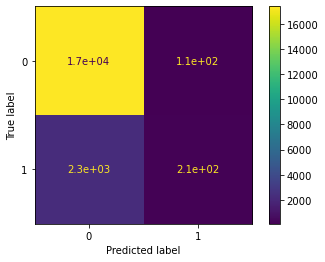

In [54]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8788333333333334
Precision 1.0
Recall 0.00410958904109589
f1_score 0.008185538881309686


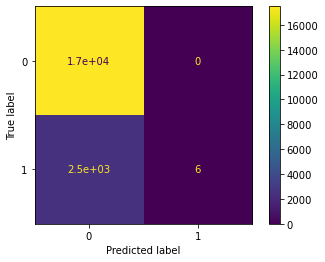

In [56]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [57]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9016666666666666
Precision 0.8333333333333334
Recall 0.23972602739726026
f1_score 0.3723404255319149


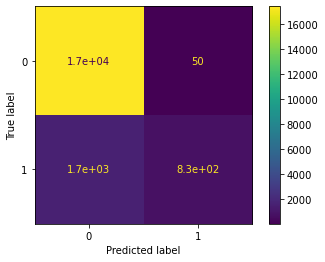

In [58]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [59]:
# Lorenz Curve

In [60]:
# Decsion Tree Lorenz Curve

In [61]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
selldata['y_pred_P']=pd.DataFrame(y_pred_prob)
selldata['P_Rank_dtree']=pd.qcut(selldata['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=selldata.groupby('P_Rank_dtree')['TARGET'].agg(['count','mean'])
rank_df_predicted=selldata.groupby('P_Rank_dtree')['y_pred_P'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_dtree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_dtree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.3155,0.321301,631.0,631.0,0.251194,0.251194,1369.0,1369.0,0.078282,0.078282,0.1729,0.1,0.1,1
1,9,2000,0.1950,0.192411,390.0,1021.0,0.155255,0.406449,1610.0,2979.0,0.092063,0.170345,0.2361,0.1,0.2,2
2,8,2000,0.1790,0.178425,358.0,1379.0,0.142516,0.548965,1642.0,4621.0,0.093893,0.264238,0.2847,0.1,0.3,3
3,7,2000,0.1460,0.150510,292.0,1671.0,0.116242,0.665207,1708.0,6329.0,0.097667,0.361905,0.3033,0.1,0.4,4
4,6,2000,0.1105,0.111329,221.0,1892.0,0.087978,0.753185,1779.0,8108.0,0.101727,0.463632,0.2896,0.1,0.5,5
5,5,2000,0.1075,0.109414,215.0,2107.0,0.085589,0.838774,1785.0,9893.0,0.102070,0.565702,0.2731,0.1,0.6,6
6,4,2000,0.0825,0.084214,165.0,2272.0,0.065685,0.904459,1835.0,11728.0,0.104929,0.670631,0.2338,0.1,0.7,7
7,3,2000,0.0525,0.045783,105.0,2377.0,0.041799,0.946258,1895.0,13623.0,0.108360,0.778991,0.1673,0.1,0.8,8
8,2,2000,0.0365,0.039604,73.0,2450.0,0.029061,0.975318,1927.0,15550.0,0.110190,0.889181,0.0861,0.1,0.9,9
9,1,2000,0.0310,0.036541,62.0,2512.0,0.024682,1.000000,1938.0,17488.0,0.110819,1.000000,-0.0000,0.1,1.0,10


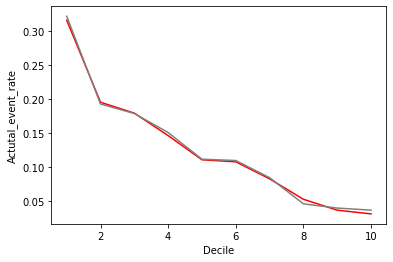

In [62]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [63]:
# Random Forest Lorenz Curve

In [64]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
selldata['pred_prob']=pd.DataFrame(y_pred_prob)
selldata['P_Rank_rf']=pd.qcut(selldata['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=selldata.groupby('P_Rank_rf')['TARGET'].agg(['count','mean'])
rank_df_predicted=selldata.groupby('P_Rank_rf')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.4300,0.255395,860.0,860.0,0.342357,0.342357,1140.0,1140.0,0.065188,0.065188,0.2772,0.1,0.1,1
1,9,2000,0.2195,0.181560,439.0,1299.0,0.174761,0.517118,1561.0,2701.0,0.089261,0.154449,0.3627,0.1,0.2,2
2,8,2000,0.1705,0.155039,341.0,1640.0,0.135748,0.652866,1659.0,4360.0,0.094865,0.249314,0.4036,0.1,0.3,3
3,7,2000,0.1240,0.136284,248.0,1888.0,0.098726,0.751592,1752.0,6112.0,0.100183,0.349497,0.4021,0.1,0.4,4
4,6,2000,0.1090,0.121484,218.0,2106.0,0.086783,0.838376,1782.0,7894.0,0.101898,0.451395,0.3870,0.1,0.5,5
5,5,2000,0.0830,0.109079,166.0,2272.0,0.066083,0.904459,1834.0,9728.0,0.104872,0.556267,0.3482,0.1,0.6,6
6,4,2000,0.0530,0.097518,106.0,2378.0,0.042197,0.946656,1894.0,11622.0,0.108303,0.664570,0.2821,0.1,0.7,7
7,3,2000,0.0290,0.085878,58.0,2436.0,0.023089,0.969745,1942.0,13564.0,0.111048,0.775618,0.1941,0.1,0.8,8
8,2,2000,0.0320,0.072862,64.0,2500.0,0.025478,0.995223,1936.0,15500.0,0.110704,0.886322,0.1089,0.1,0.9,9
9,1,2000,0.0060,0.059656,12.0,2512.0,0.004777,1.000000,1988.0,17488.0,0.113678,1.000000,0.0000,0.1,1.0,10


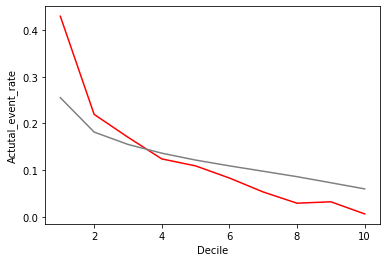

In [65]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [66]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
selldata['pred_prob']=pd.DataFrame(y_pred_prob)
selldata['P_Rank_GBM']=pd.qcut(selldata['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=selldata.groupby('P_Rank_GBM')['TARGET'].agg(['count','mean'])
rank_df_predicted=selldata.groupby('P_Rank_GBM')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,2000,0.7855,0.497375,1571.0,1571.0,0.625398,0.625398,429.0,429.0,0.024531,0.024531,0.6009,0.1,0.1,1
1,9,2000,0.2290,0.213378,458.0,2029.0,0.182325,0.807723,1542.0,1971.0,0.088175,0.112706,0.6950,0.1,0.2,2
2,8,2000,0.0885,0.141992,177.0,2206.0,0.070462,0.878185,1823.0,3794.0,0.104243,0.216949,0.6612,0.1,0.3,3
3,7,2000,0.0365,0.107556,73.0,2279.0,0.029061,0.907245,1927.0,5721.0,0.110190,0.327139,0.5801,0.1,0.4,4
4,6,2000,0.0535,0.084736,107.0,2386.0,0.042596,0.949841,1893.0,7614.0,0.108246,0.435384,0.5145,0.1,0.5,5
5,5,2000,0.0305,0.068003,61.0,2447.0,0.024283,0.974124,1939.0,9553.0,0.110876,0.546260,0.4279,0.1,0.6,6
6,4,2000,0.0150,0.054545,30.0,2477.0,0.011943,0.986067,1970.0,11523.0,0.112649,0.658909,0.3272,0.1,0.7,7
7,3,2000,0.0075,0.042122,15.0,2492.0,0.005971,0.992038,1985.0,13508.0,0.113506,0.772415,0.2196,0.1,0.8,8
8,2,2000,0.0070,0.031356,14.0,2506.0,0.005573,0.997611,1986.0,15494.0,0.113564,0.885979,0.1116,0.1,0.9,9
9,1,2000,0.0030,0.019799,6.0,2512.0,0.002389,1.000000,1994.0,17488.0,0.114021,1.000000,-0.0000,0.1,1.0,10


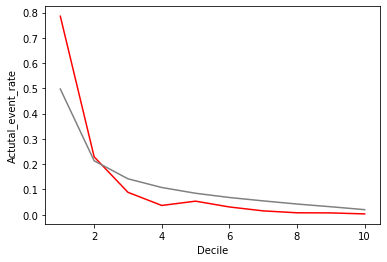

In [67]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

In [68]:
# Project Conclusion :- 
# Create a decision tree and show it to stakeholders. This will create awareness about the kind of rules that a Tree might 
# come up with
# Now speak about the benefit of ensembles and how they achieve a higher degress of robustness than a single tree
# Now is the time to show that the ensemble is as good if not better than the decison tree
# This way you can first sell the idea of a tree based solution and then sell the final product which is an ensemble of the
# idea you have already sold(decision tree)

In [69]:
selldata['BALANCE_RANK']=pd.qcut(selldata['BALANCE'].rank(method='first').values,10,duplicates='drop').codes+1
selldata['SCR_RANK']=pd.qcut(selldata['SCR'].rank(method='first').values,10,duplicates='drop').codes+1

In [70]:
selldata.groupby('BALANCE_RANK')['BALANCE'].max()

BALANCE_RANK
1       19258.14
2       47471.92
3       87783.85
4      147752.04
5      231648.02
6      340679.20
7      525551.65
8      809739.31
9     1407968.88
10    8360430.57
Name: BALANCE, dtype: float64

In [71]:
selldata.groupby('SCR_RANK')['SCR'].agg(['min','max','mean'])

,min,max,mean
SCR_RANK,,,
1,100,157,131.0790
2,157,205,181.6360
3,205,253,227.5165
4,253,306,280.2920
5,306,364,333.5955
6,364,463,407.7750
7,463,584,524.3815
8,584,705,642.3800
9,705,833,769.8070


In [72]:
selldata['BALANCE_RANK_SEGMENT']=np.where(selldata['BALANCE_RANK']<=2,"Low",(np.where(selldata['BALANCE_RANK']>=8,"High","Mid")))
selldata.BALANCE_RANK_SEGMENT.value_counts()

Mid     10000
High     6000
Low      4000
Name: BALANCE_RANK_SEGMENT, dtype: int64

In [73]:
selldata['SCR_RANK_SEGMENT']=np.where(selldata['SCR_RANK']<=3,"Low",(np.where(selldata['SCR_RANK']>=8,"High","Mid")))
selldata.SCR_RANK_SEGMENT.value_counts()

Mid     8000
High    6000
Low     6000
Name: SCR_RANK_SEGMENT, dtype: int64

In [74]:
selldata['Predicted_Resp_Rank']=np.where(selldata['P_Rank_GBM']<9,"Bottom8","Top2")
selldata.Predicted_Resp_Rank.value_counts()

Bottom8    16000
Top2        4000
Name: Predicted_Resp_Rank, dtype: int64

In [75]:
pd.crosstab(index=selldata['BALANCE_RANK_SEGMENT'], columns=selldata['Predicted_Resp_Rank'],values=selldata['TARGET'],aggfunc='mean')

Predicted_Resp_Rank,Bottom8,Top2
BALANCE_RANK_SEGMENT,,
High,0.026473,0.603774
Low,0.027310,0.501884
Mid,0.033656,0.480609


In [76]:
pd.crosstab(index=selldata['SCR_RANK_SEGMENT'], columns=selldata['Predicted_Resp_Rank'],values=selldata['TARGET'],aggfunc='mean')

Predicted_Resp_Rank,Bottom8,Top2
SCR_RANK_SEGMENT,,
High,0.027084,0.487478
Low,0.024645,0.597241
Mid,0.036790,0.487163


In [77]:
pd.crosstab(index=selldata['BALANCE_RANK_SEGMENT'], columns=selldata['Predicted_Resp_Rank'],values=selldata['TARGET'],aggfunc='count')

Predicted_Resp_Rank,Bottom8,Top2
BALANCE_RANK_SEGMENT,,
High,5364,636
Low,2673,1327
Mid,7963,2037


In [78]:
pd.crosstab(index=selldata['SCR_RANK_SEGMENT'], columns=selldata['Predicted_Resp_Rank'],values=selldata['TARGET'],aggfunc='count')

Predicted_Resp_Rank,Bottom8,Top2
SCR_RANK_SEGMENT,,
High,4283,1717
Low,5275,725
Mid,6442,1558


In [79]:
pd.pivot_table(selldata,values='TARGET',index=['SCR_RANK_SEGMENT','BALANCE_RANK_SEGMENT'],columns='Predicted_Resp_Rank',aggfunc='mean')

Predicted_Resp_Rank                     Bottom8      Top2
SCR_RANK_SEGMENT BALANCE_RANK_SEGMENT                    
High             High                  0.021116  0.545817
                 Low                   0.023227  0.498201
                 Mid                   0.032258  0.464835
Low              High                  0.025250  0.675214
                 Low                   0.021053  0.600000
                 Mid                   0.025407  0.569405
Mid              High                  0.030884  0.626866
                 Low                   0.036000  0.457364
                 Mid                   0.040847  0.458656